In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# Load the California Housing dataset
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
california_df = pd.DataFrame(data=np.c_[california['data'], california['target']],
                             columns=california['feature_names'] + ['MedHouseVal'])

In [3]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Linear regression with one predictor (e.g., MedInc)
lm_fit = LinearRegression().fit(california_df[['MedInc']], california_df['MedHouseVal'])


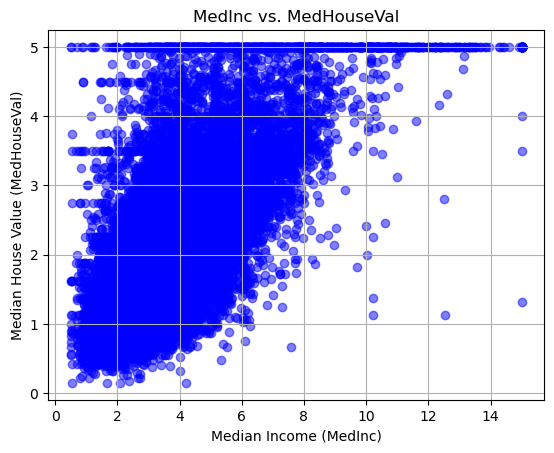

In [6]:
# Plot the data and regression line
plt.scatter(california_df['MedInc'], california_df['MedHouseVal'], color='blue', alpha=0.5)
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Median House Value (MedHouseVal)')
plt.title('MedInc vs. MedHouseVal')
plt.grid()
plt.show()

Looking at the above plot we can probably say that median house values does depend on the median income feature. But probably linear model is not the best choice (although still not unreasonable :) ).

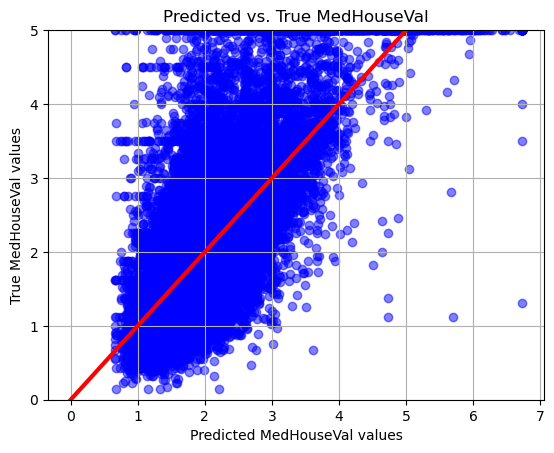

In [7]:
# Plot predicted vs. true MedHouseVal values
plt.scatter(lm_fit.predict(california_df[['MedInc']]), california_df['MedHouseVal'], color='blue', alpha=0.5)
plt.xlabel('Predicted MedHouseVal values')
plt.ylabel('True MedHouseVal values')
plt.ylim(0, 5)
plt.plot([0, 5], [0, 5], color='red', linewidth=3)
plt.title('Predicted vs. True MedHouseVal')
plt.grid()
plt.show()

Plot of predicted vs. true values is a very important visual assessment tool for checking regression fit. The more closer points are to the red line, the better the model. In this can you can see several problems: the data point cloud is obviously note very close to the line and at the top we have a cutoff at value 5. 

In [8]:
# Linear regression with two predictors (e.g., MedInc and HouseAge)
lm_fit = LinearRegression().fit(california_df[['MedInc', 'HouseAge']], california_df['MedHouseVal'])
print("Coefficients:", lm_fit.coef_)
print("Intercept:", lm_fit.intercept_)

Coefficients: [0.43169191 0.01744134]
Intercept: -0.1018903275908265


In this case with two features, the linear regression model can be expressed mathematically as follows:
$$MedHouseVal = -0.102 + 0.432 \cdot MedInc + 0.017\cdot HouseAge$$

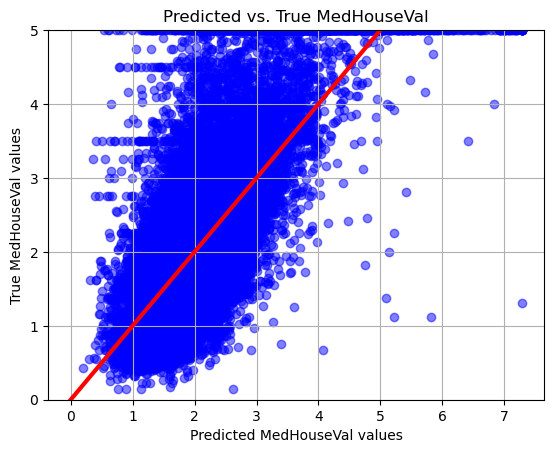

In [9]:
# Plot predicted vs. true MedHouseVal values
plt.scatter(lm_fit.predict(california_df[['MedInc', 'HouseAge']]), california_df['MedHouseVal'], color='blue', alpha=0.5)
plt.xlabel('Predicted MedHouseVal values')
plt.ylabel('True MedHouseVal values')
plt.ylim(0, 5)
plt.plot([0, 5], [0, 5], color='red', linewidth=3)
plt.title('Predicted vs. True MedHouseVal')
plt.grid()
plt.show()

Addition of second feature HouseAge did not improve things :(

Coefficients: [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
Intercept: -36.94192020718441


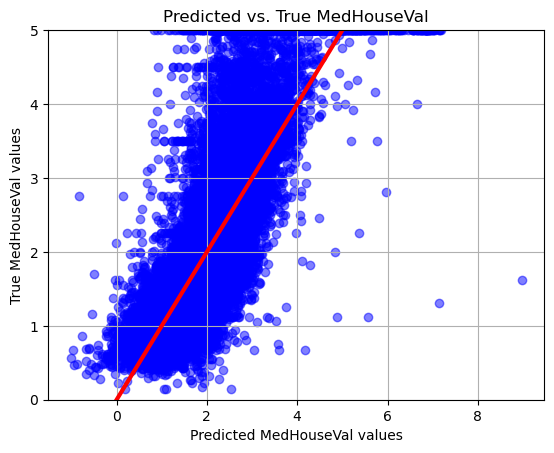

In [10]:
# Linear regression with all predictors
lm_fit = LinearRegression().fit(california_df.drop(columns=['MedHouseVal']), california_df['MedHouseVal'])
print("Coefficients:", lm_fit.coef_)
print("Intercept:", lm_fit.intercept_)

# Plot predicted vs. true MedHouseVal values
plt.scatter(lm_fit.predict(california_df.drop(columns=['MedHouseVal'])), california_df['MedHouseVal'], color='blue', alpha=0.5)
plt.xlabel('Predicted MedHouseVal values')
plt.ylabel('True MedHouseVal values')
plt.ylim(0, 5)
plt.plot([0, 5], [0, 5], color='red', linewidth=3)
plt.title('Predicted vs. True MedHouseVal')
plt.grid()
plt.show()

Using all features did improve LR fit. However, we can still see that at the larger values of MedHouseVal the fit is not satisfactory. 

In [11]:
# Linear regression without a particular predictor (e.g., Latitude)
lm_fit1 = LinearRegression().fit(california_df.drop(columns=['MedHouseVal', 'Latitude']), california_df['MedHouseVal'])
print("Coefficients:", lm_fit1.coef_)
print("Intercept:", lm_fit1.intercept_)

Coefficients: [ 5.38442363e-01  1.61857402e-02 -2.15955821e-01  1.01357497e+00
  2.43974882e-05 -4.88468502e-03 -1.95828824e-02]
Intercept: -2.7795630774080355


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    california_df.drop(columns=['MedHouseVal']), california_df['MedHouseVal'], test_size=0.2, random_state=1)
lm_fit = LinearRegression().fit(X_train, y_train)
y_pred = lm_fit.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.5971444783459439


Transformation of some features might improve things. Transforming feature and adding to linear regression still produces linear model but with non-linear effects (more on this in theory lecture).

In [24]:
california_df['HouseAge_log']=np.log(california_df['HouseAge'])
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,HouseAge_log
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,3.713572
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.044522
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.951244
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.951244
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.951244


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    california_df.drop(columns=['MedHouseVal']), california_df['MedHouseVal'], test_size=0.2, random_state=1)
lm_fit = LinearRegression().fit(X_train, y_train)
y_pred = lm_fit.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.5971444783459439


The transformation did not improve $R^2$. But that's because I did not look for other possible transformations :)
